In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.animation as animation

import imageio

import datetime


In [2]:
# C:\Users\cruze\Documents\GitHub\covid19\csse_covid_19_data\csse_covid_19_time_series

# confirmed_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_US.csv')
confirmed_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
confDF = pd.read_csv(confirmed_URL)

# global_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_confirmed_global.csv')
global_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
globalDF = pd.read_csv(global_URL)

# death_path = os.path.join(os.getcwd(), 'csse_covid_19_data', 'csse_covid_19_time_series', 'time_series_covid19_deaths_US.csv')
deathsUS_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv'
deathDF = pd.read_csv(deathsUS_URL)

deathsGlobal_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
deathGlobalDF = pd.read_csv(deathsGlobal_URL)
# dateDict = dict(zip(confDF.columns[11:], pd.to_datetime(confDF.columns[11:])))
# confDF = confDF.rename(dateDict, axis='columns')

popPath = os.path.join(os.getcwd(), 'USpopulation.csv')
popDF = pd.read_csv(popPath)

In [3]:
confDF

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1447,1463,1619,1624,1664,1673,1690,1691,1714,1715
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4800,4812,5003,5021,5033,5047,5061,5087,5124,5141
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,626,629,809,809,824,830,835,838,848,851
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,581,580,612,617,619,628,632,636,635,638
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1128,1139,1487,1504,1527,1542,1551,1560,1573,1580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,84056039,US,USA,840,56039.0,Teton,Wyoming,US,43.935225,-110.589080,...,476,478,481,487,490,493,498,504,506,517
3336,84056041,US,USA,840,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,...,312,312,323,327,327,330,334,335,339,342
3337,84090056,US,USA,840,90056.0,Unassigned,Wyoming,US,0.000000,0.000000,...,2,2,0,0,1,1,1,0,0,0
3338,84056043,US,USA,840,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,...,111,111,111,112,113,113,113,113,113,113


In [4]:
byStateDF = confDF.groupby('Province_State').sum()

states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas',
       'California', 'Colorado', 'Connecticut', 'Delaware',
       'District of Columbia', 'Florida', 'Georgia',
       'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky',
       'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan',
       'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia',
       'Wisconsin', 'Wyoming']

byStateDF = byStateDF.loc[states]

deathStateDF = deathDF.groupby('Province_State').sum()

deathStateDF = deathStateDF.loc[states]

# population = confDF.set_index('Combined_Key').join(popDF[['NAME', 'POP']].set_index('NAME'))['POP']

population = confDF.set_index('Combined_Key').join(popDF[['NAME', 'POP']].set_index('NAME'))['POP']

# popDF['FIPS'] = popDF['FIPS'].astype(str)
# confDF['FIPS'] = confDF['FIPS'].astype(str)

In [5]:
temp = confDF.set_index('FIPS').join(popDF[['FIPS', 'POP']].set_index('FIPS'))

temp.to_csv('temp.csv')

In [6]:
confDF.set_index('FIPS').join(popDF[['FIPS', 'POP']].set_index('FIPS'))

,UID,iso2,iso3,code3,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,...,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,POP
FIPS,,,,,,,,,,,,,,,,,,,,,
60.0,16,AS,ASM,16,NaN,American Samoa,US,-14.271000,-170.132000,"American Samoa, US",...,0,0,0,0,0,0,0,0,0,NaN
66.0,316,GU,GUM,316,NaN,Guam,US,13.444300,144.793700,"Guam, US",...,1966,2013,2045,2074,2074,2074,2147,2190,2235,NaN
69.0,580,MP,MNP,580,NaN,Northern Mariana Islands,US,15.097900,145.673900,"Northern Mariana Islands, US",...,61,61,62,62,68,68,69,69,69,NaN
78.0,850,VI,VIR,850,NaN,Virgin Islands,US,18.335800,-64.896300,"Virgin Islands, US",...,1232,1232,1238,1257,1257,1269,1269,1278,1290,NaN
1001.0,84001001,US,USA,840,Autauga,Alabama,US,32.539527,-86.644082,"Autauga, Alabama, US",...,1463,1619,1624,1664,1673,1690,1691,1714,1715,55869.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,84070016,US,USA,840,Central Utah,Utah,US,39.372319,-111.575868,"Central Utah, Utah, US",...,563,567,575,580,593,600,610,613,616,NaN
NaN,84070017,US,USA,840,Southeast Utah,Utah,US,38.996171,-110.701396,"Southeast Utah, Utah, US",...,166,167,168,168,173,178,181,184,186,NaN
NaN,84070018,US,USA,840,Southwest Utah,Utah,US,37.854472,-111.441876,"Southwest Utah, Utah, US",...,3880,3903,3926,3963,3991,4013,4028,4048,4067,NaN


In [7]:
# byStateDF[byStateDF < 1] = 1

dfData = byStateDF.iloc[:, 5:]

#add South Korea and Italy
temp = globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,5:]
temp = temp.append(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,5:])
temp = temp.append(globalDF[globalDF.index==223].iloc[:,5:])
temp = temp.rename(index={143 : 'South Korea', 137 : 'Italy', 223 : 'United Kingdom'})
dfData = dfData.append(temp)


dfLabels = byStateDF.iloc[:, :5]
labels = dfLabels.index.tolist()
labels.append('South Korea')
labels.append('Italy')
labels.append('United Kingdom')

dfDiff = dfData.diff(axis=1).iloc[:,1:]
dfData = dfData.iloc[:,1:]

dfDiff = dfDiff.transpose().rolling(window=3).mean().transpose()

plt_path = os.path.join(os.getcwd(), 'plots')

dfData[dfData < 1] = 1
dfDiff[dfDiff < 1] = 1

# dfDiff.to_csv('diff.csv')
# dfData.to_csv('state.csv')


for j in range(0,int(len(dfData.columns))):

    plotname = 'plot' + str(j).zfill(4) + '.png'
    plot_path = os.path.join(os.getcwd(), 'plots', plotname)
    

    plt.figure(figsize=(22, 10))
    plt.plot(dfData.iloc[:,:j].transpose(), dfDiff.iloc[:,:j].transpose(), alpha=0.2)

    for i, lab in enumerate(labels):
        x = dfData.iloc[i,j-1]
        y = dfDiff.iloc[i,j-1]
        plt.scatter(x, y, marker='o', color='red')
        plt.text(x+0.5, y+0.5, lab, fontsize=11)

    plt.title('Confirmed Cases on ' + dfData.iloc[:,j].name + ' vs. Total Cases ')
    plt.yscale('log')
    plt.xscale('log')
    plt.xlabel('Total Cases')
    plt.ylabel('New Daily Cases')
    plt.xlim(1, 1000000)
    plt.ylim(1, 100000)
    plt.xticks(rotation='vertical')

    plt.savefig(plot_path)
    plt.clf()
    plt.close()
    # plt.show()



img_path = os.path.join(os.getcwd(), 'plots')
filenames = os.listdir(img_path)
save_path = os.path.join(os.getcwd(), 'animated.gif')

print('reading files...')

d = "plots"
filenames = []
for path in os.listdir(d):
    full_path = os.path.join(d, path)
    if os.path.isfile(full_path):
        filenames.append(full_path)

print('saving gif...')

filenames = filenames[-30:]

images = []
for filename in filenames:
    images.append(imageio.imread(filename))
imageio.mimsave(save_path, images, duration=1)

------------------------------------------------------------------------

below this line in progress

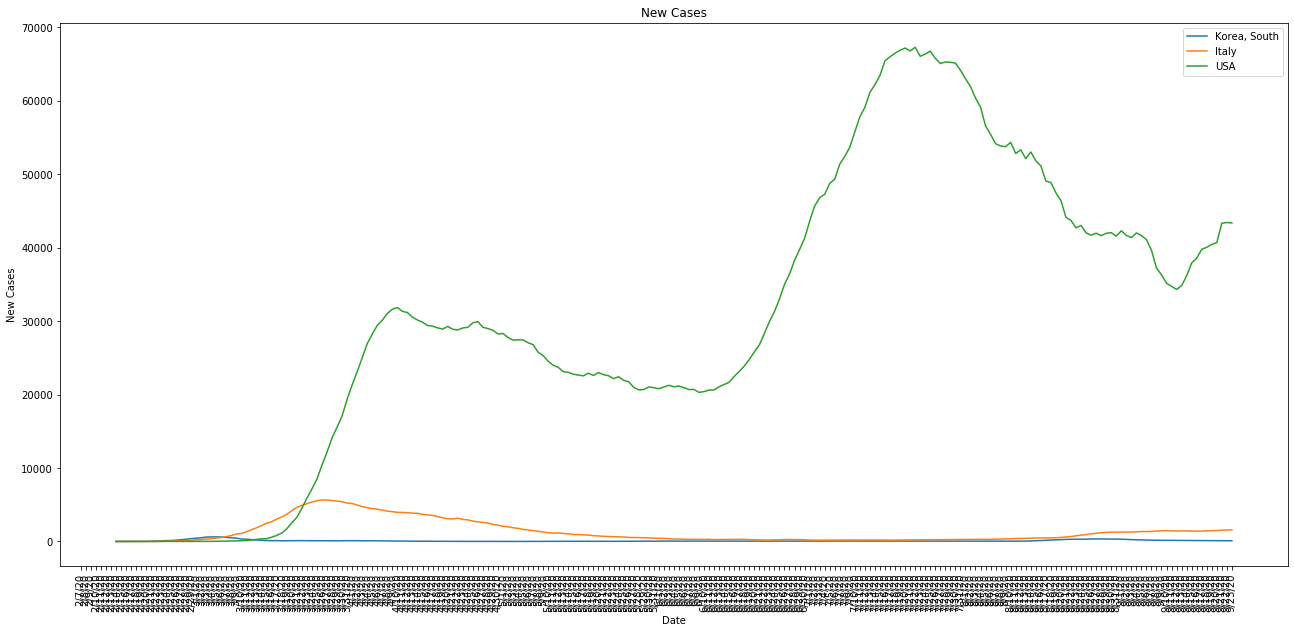

In [8]:

plt.figure(figsize=(22, 10))

# plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,4:].transpose())

plt.plot(globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Korea, South')
plt.plot(globalDF[globalDF['Country/Region']=='Italy'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Italy')
plt.plot(globalDF[globalDF['Country/Region']=='US'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='USA')
# plt.plot(globalDF[globalDF['Country/Region']=='Taiwan'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Italy')
# plt.plot(globalDF[globalDF['Country/Region']=='Canada'].iloc[:,20:].transpose().diff().rolling(window=7).mean(), label='Italy')


# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='California')
# plt.plot(byStateDF[byStateDF.index=='New York'].iloc[:,40:].transpose().diff().rolling(window=7).mean(), label='New York')
# plt.plot(byStateDF[byStateDF.index=='New Jersey'].iloc[:,40:].transpose().diff().rolling(window=7).mean(), label='New Jersey')
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Oregon')
# plt.plot(byStateDF[byStateDF.index=='Florida'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Florida')
# plt.plot(byStateDF[byStateDF.index=='Georgia'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Georgia')
# plt.plot(byStateDF[byStateDF.index=='South Carolina'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='South Carolina')
# plt.plot(byStateDF[byStateDF.index=='Louisiana'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Louisiana')
# plt.plot(byStateDF[byStateDF.index=='Michigan'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Michigan')
# plt.plot(byStateDF[byStateDF.index=='Texas'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Texas')
# plt.plot(byStateDF[byStateDF.index=='Massachusetts'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Massachusetts')
# plt.plot(byStateDF[byStateDF.index=='Illinois'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Illinois')
# plt.plot(byStateDF[byStateDF.index=='Washington'].iloc[:,30:].transpose().diff().rolling(window=7).mean(), label='Washington')

# plt.plot(globalDF[globalDF.index==223].iloc[:,10:].transpose().diff().rolling(window=7).mean(), label='UK')

# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title('New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('New Cases')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
plt.legend(loc='best')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()


In [9]:
globalDF[globalDF['Country/Region']=='France'].iloc[:,20:].transpose().diff().rolling(window=7).mean()

# globalDF[globalDF['Country/Region']=='France'].iloc[:,20:].transpose().diff().rolling(window=7).mean()

,116,117,118,119,120,121,122,123,124,125,126
2/7/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/8/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/9/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/10/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/11/20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9/19/20,24.428571,45.428571,49.428571,26.142857,23.857143,0.0,67.285714,0.285714,0.000000,10.571429,9010.142857
9/20/20,24.428571,45.428571,49.428571,26.142857,23.857143,0.0,55.571429,0.285714,0.000000,10.571429,9010.142857
9/21/20,22.857143,24.571429,49.428571,26.142857,23.857143,0.0,77.571429,0.000000,0.000000,0.000000,9915.714286
9/22/20,22.857143,42.142857,49.428571,24.000000,23.857143,0.0,73.285714,0.000000,0.000000,0.000000,10228.000000


In [10]:
# deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,-1]

# deathGlobalDF[deathGlobalDF['Country/Region']=='Italy'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='Italy'].iloc[:,-1]



# deathStateDF[deathStateDF.index=='New York'].iloc[:,-1] / byStateDF[byStateDF.index=='New York'].iloc[:,-1]


deathGlobalDF[deathGlobalDF['Country/Region']=='US'].iloc[:,-1] / globalDF[globalDF['Country/Region']=='US'].iloc[:,-1]

242    0.029117
Name: 9/23/20, dtype: float64

No handles with labels found to put in legend.


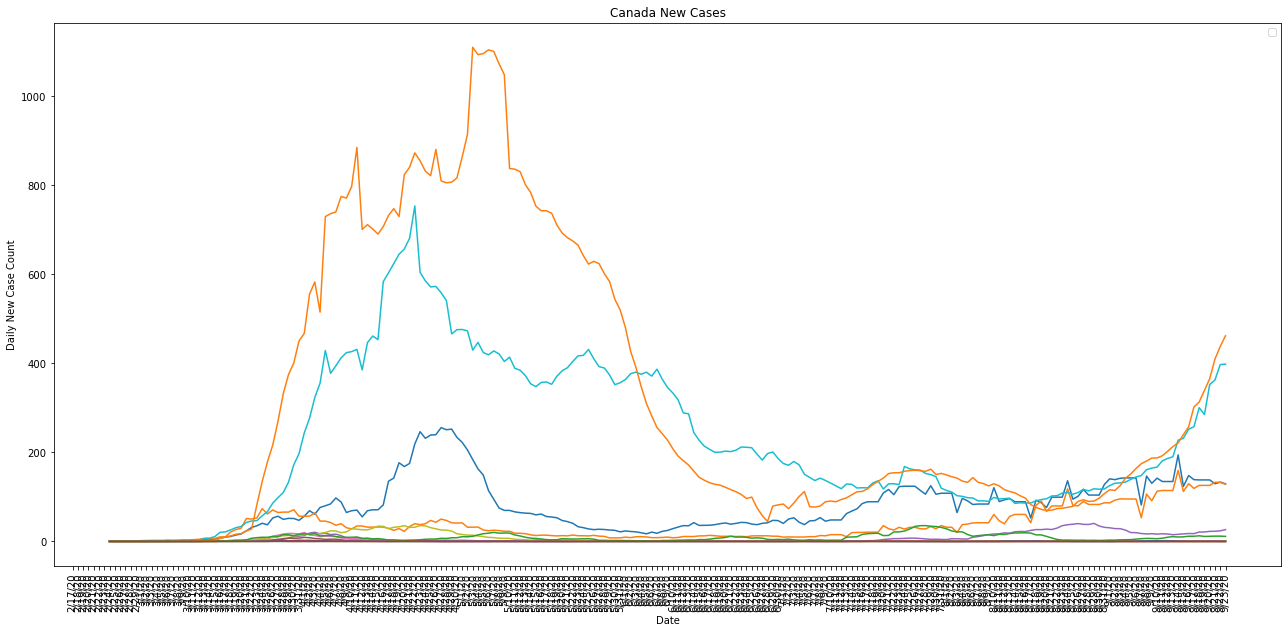

In [11]:
country = 'Canada'

plt.figure(figsize=(22, 10))

data = globalDF[globalDF['Country/Region']==country].iloc[:,30:].transpose().diff().rolling(window=7).mean()

# plt.plot(deathGlobalDF[deathGlobalDF['Country/Region']=='Korea, South'].iloc[:,20:].transpose().diff().rolling(window=7).mean())
plt.plot(data)


# plt.plot(byStateDF[byStateDF.index=='California'].iloc[:,5:].transpose().diff().rolling(window=7).mean())
# plt.plot(byStateDF[byStateDF.index=='Oregon'].iloc[:,5:].transpose())

# for i, lab in enumerate(labels):
#     x = dfData.iloc[i,j]
#     y = dfDiff.iloc[i,j]
#     plt.scatter(x, y, marker='o', color='red')
#     plt.text(x+0.3, y+0.3, lab, fontsize=12)

plt.title(country + ' New Cases')
# plt.yscale('log')
# plt.xscale('log')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')
# plt.xlim(left='2/19/2020')
# plt.ylim(1, 100000)
plt.legend(loc='left')
plt.xticks(rotation='vertical')

# plt.savefig(plot_path)
# plt.clf()
# plt.close()
plt.show()

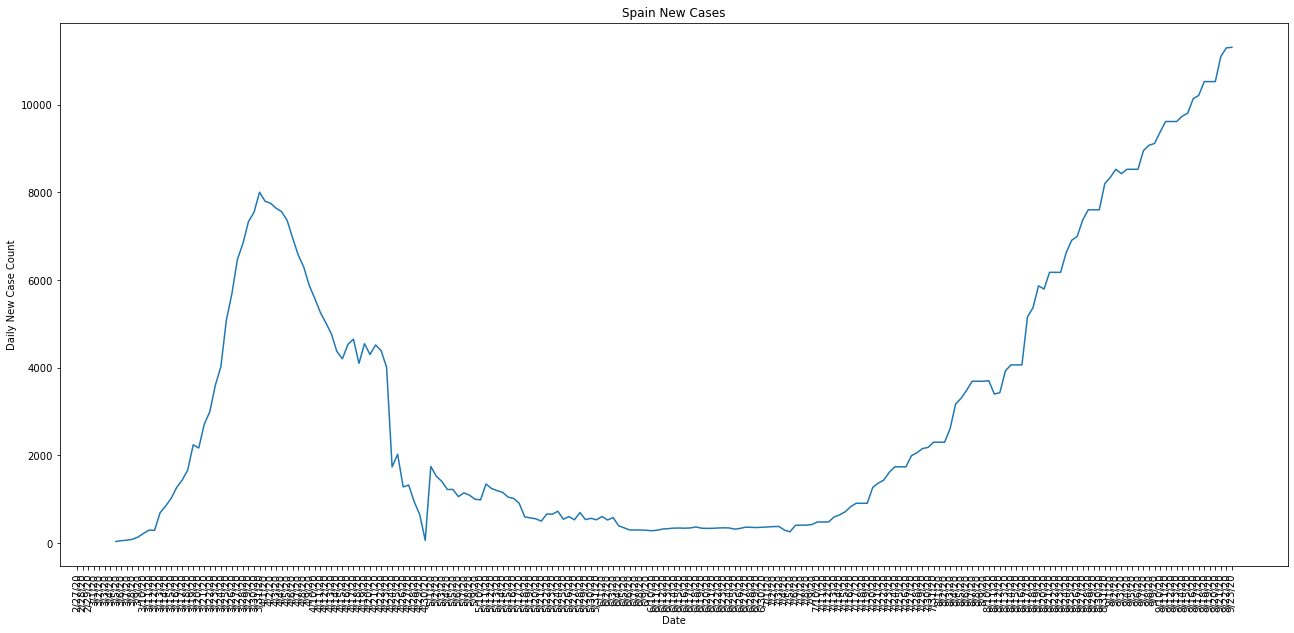

In [65]:
country = 'Spain'

plt.figure(figsize=(22, 10))

plt.plot(globalDF[globalDF['Country/Region']==country].iloc[:,40:].transpose().diff().rolling(window=7).mean())

labels = globalDF[globalDF['Country/Region']==country]['Province/State'].to_list()

# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title(country + ' New Cases')

plt.xlabel('Date')
plt.ylabel('Daily New Case Count')

plt.show()



In [13]:
confDF[confDF['Country_Region'] == 'US'].groupby('Country_Region').sum().iloc[:,5:].transpose().diff()

Country_Region,US
1/22/20,NaN
1/23/20,0.0
1/24/20,1.0
1/25/20,0.0
1/26/20,3.0
...,...
9/19/20,44186.0
9/20/20,36695.0
9/21/20,52070.0
9/22/20,39334.0


In [14]:
confDF[confDF['Province_State']=='California'].sort_values(by=confDF.columns[-1], ascending=False).iloc[:20,:]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
213,84006037,US,USA,840,6037.0,Los Angeles,California,US,34.308284,-118.228241,...,254656,255049,256148,257271,258516,259817,260797,261446,262133,263333
228,84006065,US,USA,840,6065.0,Riverside,California,US,33.743150,-115.993358,...,55766,55986,56201,56374,56681,56681,56681,57419,57482,57695
231,84006071,US,USA,840,6071.0,San Bernardino,California,US,34.840603,-116.177469,...,50709,50978,51252,51467,51750,52287,52471,52649,52873,53121
224,84006059,US,USA,840,6059.0,Orange,California,US,33.701475,-117.764600,...,50974,51124,51259,51399,51646,51873,52063,52201,52382,52538
232,84006073,US,USA,840,6073.0,San Diego,California,US,33.034846,-116.736533,...,42887,43181,43445,43619,44007,44293,44577,44925,45147,45425
209,84006029,US,USA,840,6029.0,Kern,California,US,35.343294,-118.727780,...,30735,30850,30916,31076,31148,31261,31379,31509,31572,31647
204,84006019,US,USA,840,6019.0,Fresno,California,US,36.757339,-119.646695,...,27196,27232,27312,27381,27487,27560,27668,27769,27843,27944
229,84006067,US,USA,840,6067.0,Sacramento,California,US,38.451068,-121.342537,...,20435,20545,20660,20961,21171,21171,21297,21628,21628,21800
195,84006001,US,USA,840,6001.0,Alameda,California,US,37.646294,-121.892927,...,20022,20097,20097,20162,20364,20494,20558,20641,20748,20839
238,84006085,US,USA,840,6085.0,Santa Clara,California,US,37.231049,-121.697046,...,19613,19683,19760,19891,20129,20252,20410,20511,20587,20648


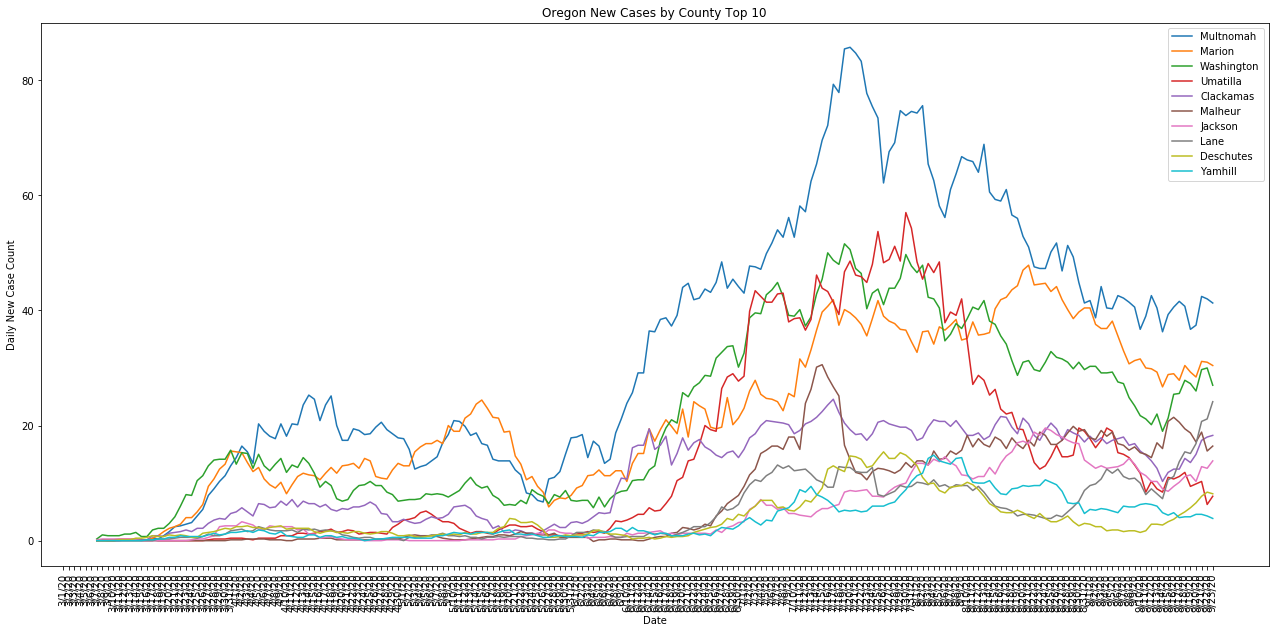

In [15]:
state = 'Oregon'

counties = confDF[confDF['Province_State']==state].sort_values(by=confDF.columns[-1], ascending=False).Admin2.tolist()
dates = confDF[confDF['Province_State']==state].sort_values(by=confDF.columns[-1], ascending=False).iloc[:,20:].columns.tolist()


data = pd.DataFrame(np.array(confDF[confDF['Province_State']==state].sort_values(by=confDF.columns[-1], ascending=False).iloc[:,20:]), index=counties, columns=dates).transpose()
labels = data.columns


plt.figure(figsize=(22, 10))
plt.plot(data.diff().iloc[30:,:10].rolling(window=7).mean())
# plt.plot(data.diff().iloc[30:,:10])

plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title(state + ' New Cases by County Top 10')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')

plt.show()



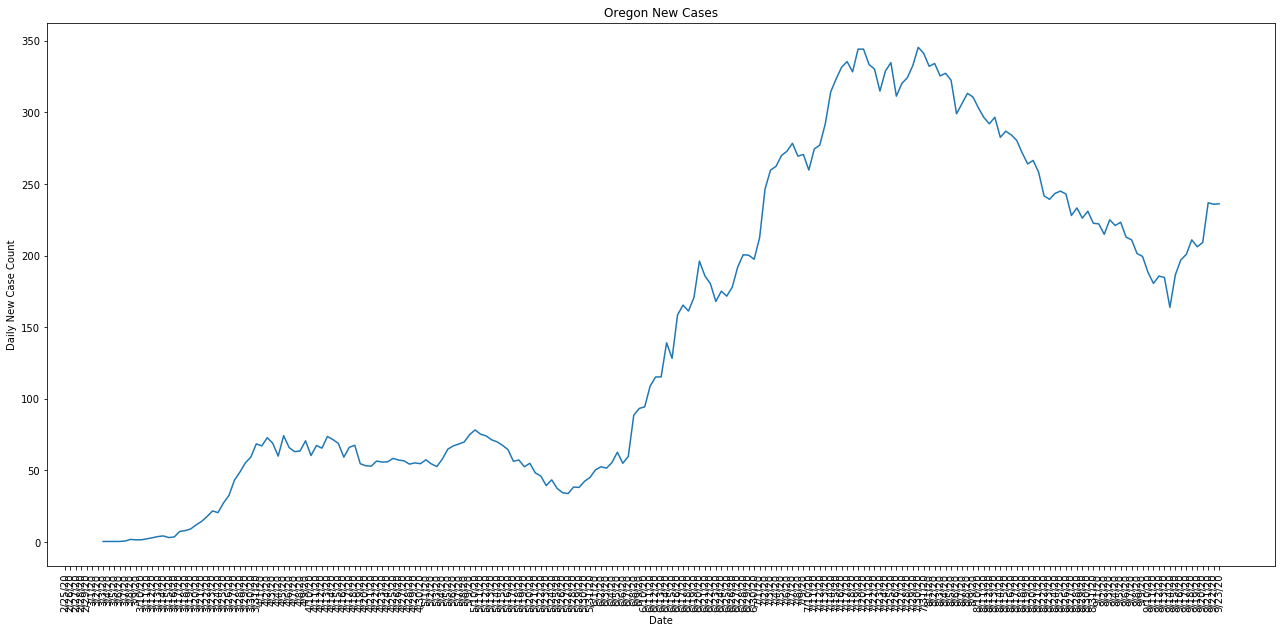

In [16]:
state = 'Oregon'

data = byStateDF[byStateDF.index==state].iloc[:,39:].transpose().diff().rolling(window=7).mean()


labels = data.columns


plt.figure(figsize=(22, 10))
plt.plot(data)
# plt.plot(data.diff().iloc[30:,:10])

# plt.plot(data.diff().iloc[30:,:10])
# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title(state + ' New Cases')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')
# plt.yscale('log')


plt.show()

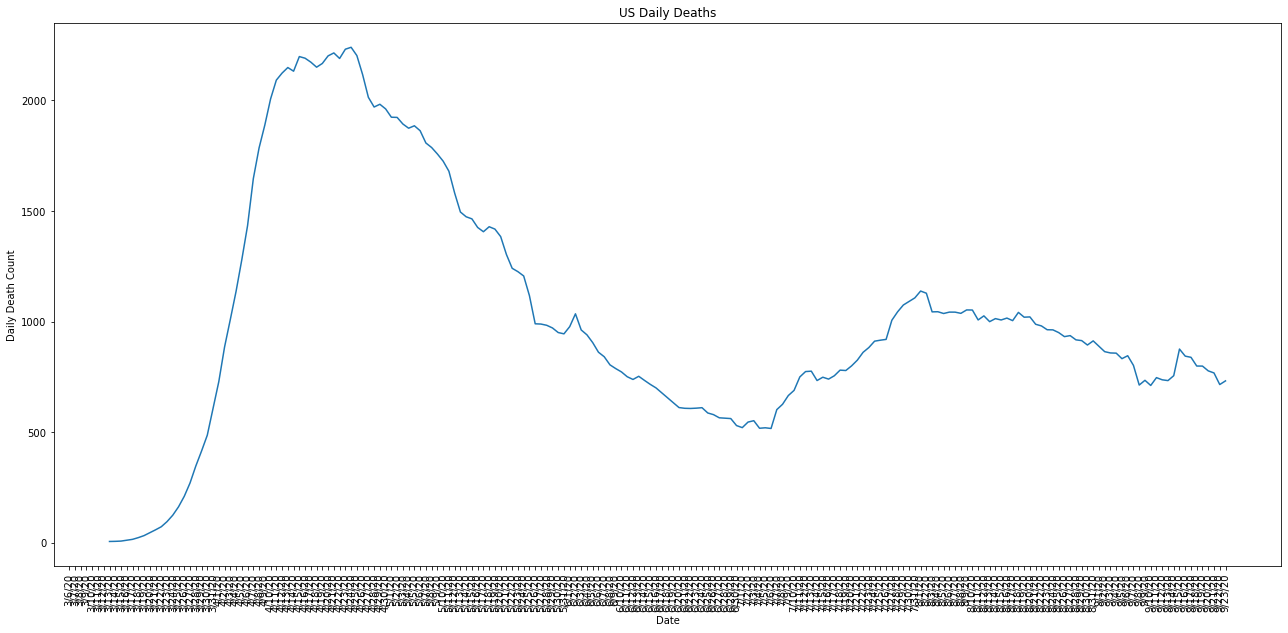

In [17]:
data = deathDF.groupby('Country_Region').sum().iloc[:,50:].transpose().diff().rolling(window=7).mean()



plt.figure(figsize=(22, 10))
plt.plot(data)
# plt.plot(data.diff().iloc[30:,:10])

# plt.plot(data.diff().iloc[30:,:10])
# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title('US Daily Deaths')
plt.xlabel('Date')
plt.ylabel('Daily Death Count')
# plt.yscale('log')


plt.show()

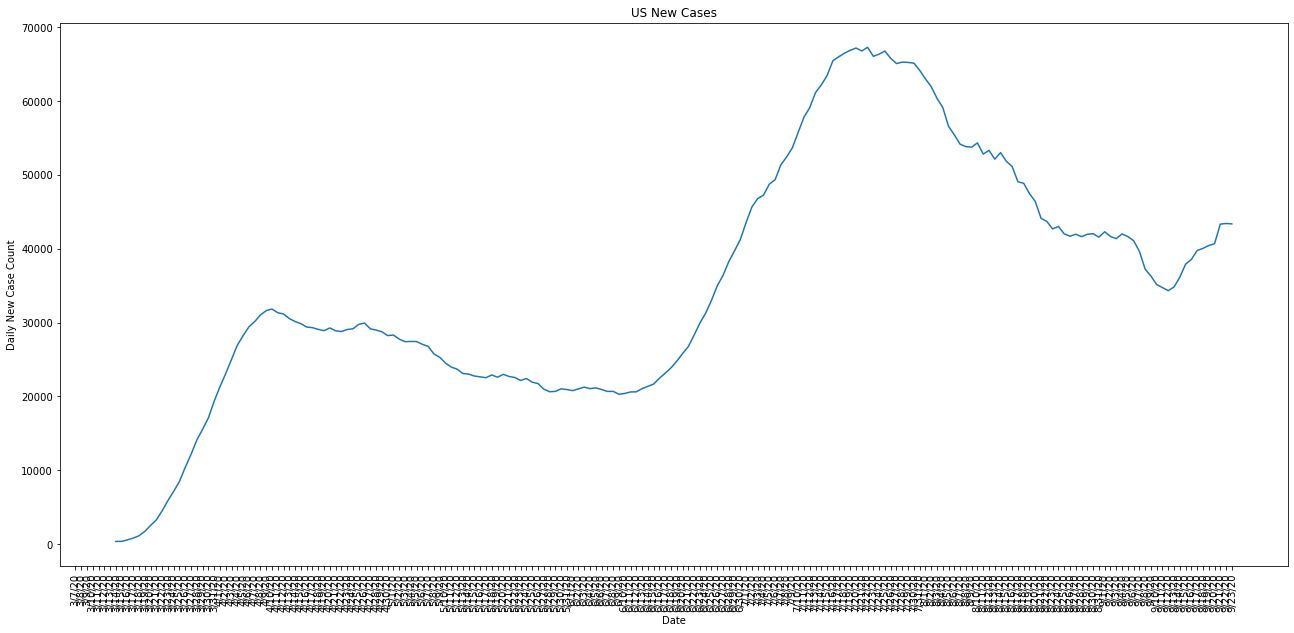

In [18]:
data = confDF.groupby('Country_Region').sum().transpose().iloc[50:,:].diff().rolling(window=7).mean()


plt.figure(figsize=(22, 10))
plt.plot(data)
# plt.plot(data.diff().iloc[30:,:10])

# plt.plot(data.diff().iloc[30:,:10])
# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')
plt.title('US New Cases')
plt.xlabel('Date')
plt.ylabel('Daily New Case Count')
# plt.yscale('log')


plt.show()

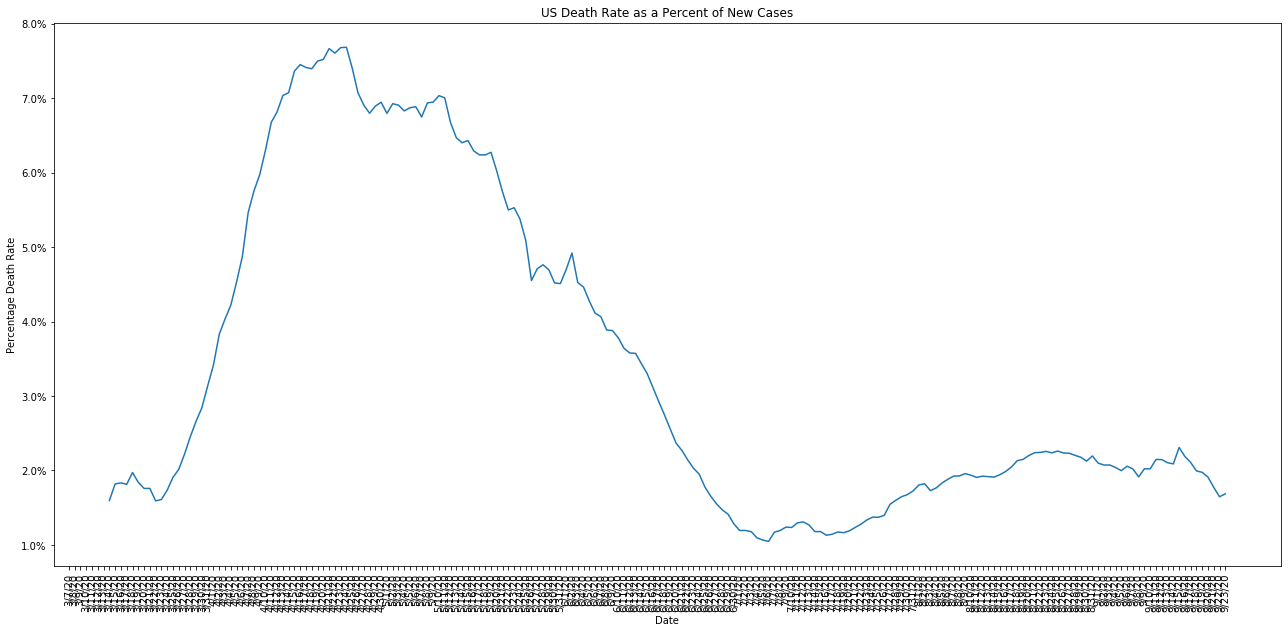

In [19]:
import matplotlib.ticker as mtick


data1 = deathDF.groupby('Country_Region').sum().iloc[:,51:].transpose().diff().rolling(window=7).mean()

data2 = confDF.groupby('Country_Region').sum().transpose().iloc[50:,:].diff().rolling(window=7).mean()

data = data1 / data2


plt.figure(figsize=(22, 10))
plt.plot(data)
# plt.plot(data.diff().iloc[30:,:10])

# plt.plot(data.diff().iloc[30:,:10])
# plt.legend(labels, loc='left')
plt.xticks(rotation='vertical')

plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))


plt.title('US Death Rate as a Percent of New Cases')
plt.xlabel('Date')
plt.ylabel('Percentage Death Rate')
# plt.yscale('log')

plt.show()

In [30]:
state = 'California'

counties = confDF[confDF['Province_State'] == state].Admin2

tempDF = confDF[confDF['Province_State'] == state].iloc[:,20:].transpose().diff().rename(columns=counties).rolling(window=7).mean().transpose()

tempDF.sort_values(by=confDF.columns[-1], ascending=False).iloc[:20,-10:]

,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
Los Angeles,833.571429,829.714286,898.428571,892.428571,921.428571,948.714286,973.142857,970.000000,1012.000000,1026.428571
San Diego,319.285714,330.428571,303.000000,287.285714,291.142857,268.428571,271.142857,291.142857,280.857143,282.857143
San Bernardino,145.428571,183.857143,191.857143,179.571429,195.000000,249.142857,253.142857,277.142857,270.714286,267.000000
Riverside,254.142857,202.000000,209.428571,215.142857,229.714286,229.714286,229.714286,236.142857,213.714286,213.428571
Orange,161.285714,161.142857,152.714286,132.571429,147.571429,159.000000,161.857143,175.285714,179.714286,182.714286
Sacramento,186.714286,155.000000,162.285714,184.571429,214.571429,158.285714,159.000000,170.428571,154.714286,162.857143
Santa Clara,143.142857,138.000000,129.428571,148.142857,140.857143,119.285714,123.000000,128.285714,129.142857,126.857143
Alameda,96.000000,85.857143,71.571429,64.571429,77.857143,93.857143,81.000000,88.428571,93.000000,106.000000
Kern,93.571429,95.857143,102.000000,100.714286,101.142857,99.714286,108.142857,110.571429,103.142857,104.428571
Contra Costa,101.714286,101.714286,107.000000,94.142857,96.285714,96.571429,90.571429,86.714286,90.285714,95.285714


In [21]:
confDF.iloc[:,20:].diff(axis=1)

,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,16.0,156.0,5.0,40.0,9.0,17.0,1.0,23.0,1.0
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,19.0,12.0,191.0,18.0,12.0,14.0,14.0,26.0,37.0,17.0
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,180.0,0.0,15.0,6.0,5.0,3.0,10.0,3.0
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,-1.0,32.0,5.0,2.0,9.0,4.0,4.0,-1.0,3.0
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,11.0,348.0,17.0,23.0,15.0,9.0,9.0,13.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,2.0,3.0,6.0,3.0,3.0,5.0,6.0,2.0,11.0
3336,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,11.0,4.0,0.0,3.0,4.0,1.0,4.0,3.0
3337,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-2.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0
3338,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
population

Combined_Key
Autauga, Alabama, US        55869.0
Baldwin, Alabama, US       223234.0
Barbour, Alabama, US        24686.0
Bibb, Alabama, US           22394.0
Blount, Alabama, US         57826.0
                             ...   
Teton, Wyoming, US          23464.0
Uinta, Wyoming, US          20226.0
Unassigned, Wyoming, US         NaN
Washakie, Wyoming, US        7805.0
Weston, Wyoming, US          6927.0
Name: POP, Length: 3340, dtype: float64

In [23]:
confDF.iloc[:,20:].diff(axis=1).div(population.tolist(), axis=0)

,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000089,0.000286,0.002792,0.000089,0.000716,0.000161,0.000304,0.000018,0.000412,0.000018
1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000085,0.000054,0.000856,0.000081,0.000054,0.000063,0.000063,0.000116,0.000166,0.000076
2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000162,0.000122,0.007292,0.000000,0.000608,0.000243,0.000203,0.000122,0.000405,0.000122
3,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000134,-0.000045,0.001429,0.000223,0.000089,0.000402,0.000179,0.000179,-0.000045,0.000134
4,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000121,0.000190,0.006018,0.000294,0.000398,0.000259,0.000156,0.000156,0.000225,0.000121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000256,0.000085,0.000128,0.000256,0.000128,0.000128,0.000213,0.000256,0.000085,0.000469
3336,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000049,0.000000,0.000544,0.000198,0.000000,0.000148,0.000198,0.000049,0.000198,0.000148
3337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3338,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000128,0.000128,0.000000,0.000000,0.000000,0.000000,0.000000


In [24]:
confByPopDF = pd.concat([confDF.iloc[:,:11], confDF.iloc[:,20:].diff(axis=1).rolling(window=7, axis=1).mean().div(population.tolist(), axis=0)], axis=1)

In [25]:
confByPopDF[confByPopDF['Province_State'] == 'Oregon'].sort_values(by=confByPopDF.columns[-1], ascending=False).iloc[:30,:]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
2313,84041045,US,USA,840,41045.0,Malheur,Oregon,US,43.193703,-117.622740,...,0.000523,0.000678,0.000701,0.000673,0.000636,0.000612,0.000561,0.000617,0.000509,0.000537
2325,84041065,US,USA,840,41065.0,Wasco,Oregon,US,45.162928,-121.167095,...,0.000027,0.000027,0.000037,0.000032,0.000043,0.000043,0.000037,0.000091,0.000220,0.000230
2315,84041049,US,USA,840,41049.0,Morrow,Oregon,US,45.418466,-119.584546,...,0.000197,0.000209,0.000185,0.000172,0.000234,0.000185,0.000209,0.000234,0.000172,0.000172
2306,84041031,US,USA,840,41031.0,Jefferson,Oregon,US,44.628068,-121.178320,...,0.000075,0.000087,0.000110,0.000139,0.000133,0.000145,0.000151,0.000151,0.000127,0.000116
2321,84041059,US,USA,840,41059.0,Umatilla,Oregon,US,45.590731,-118.735383,...,0.000108,0.000141,0.000137,0.000143,0.000152,0.000121,0.000126,0.000132,0.000081,0.000099
2314,84041047,US,USA,840,41047.0,Marion,Oregon,US,44.902879,-122.581512,...,0.000077,0.000083,0.000083,0.000080,0.000087,0.000084,0.000082,0.000090,0.000089,0.000087
2294,84041007,US,USA,840,41007.0,Clatsop,Oregon,US,45.997129,-123.660711,...,0.000018,0.000021,0.000028,0.000021,0.000032,0.000039,0.000053,0.000067,0.000075,0.000078
2301,84041021,US,USA,840,41021.0,Gilliam,Oregon,US,45.371601,-120.204887,...,0.000075,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000224,0.000075,0.000075
2292,84041003,US,USA,840,41003.0,Benton,Oregon,US,44.491673,-123.431699,...,0.000026,0.000025,0.000021,0.000020,0.000017,0.000055,0.000063,0.000055,0.000064,0.000066
2310,84041039,US,USA,840,41039.0,Lane,Oregon,US,43.937270,-122.847753,...,0.000019,0.000028,0.000029,0.000036,0.000040,0.000040,0.000044,0.000054,0.000055,0.000063


In [26]:
confByPopDF.sort_values(by=confByPopDF.columns[-1], ascending=False).iloc[:30,:]

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
2290,84040153,US,USA,840,40153.0,Woodward,Oklahoma,US,36.423163,-99.262830,...,0.000254,0.000205,0.000226,0.000269,0.000304,0.001131,0.002983,0.005669,0.005718,0.005888
2745,84048095,US,USA,840,48095.0,Concho,Texas,US,31.326359,-99.864730,...,0.000210,0.000419,0.000314,0.000314,0.000210,0.001415,0.001415,0.001415,0.003249,0.003302
2080,84038029,US,USA,840,38029.0,Emmons,North Dakota,US,46.283984,-100.238977,...,0.000837,0.000926,0.001234,0.002028,0.002160,0.002997,0.002909,0.003306,0.003174,0.003085
2766,84048137,US,USA,840,48137.0,Edwards,Texas,US,29.982026,-100.304252,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002440,0.002440,0.002440
935,84020023,US,USA,840,20023.0,Cheyenne,Kansas,US,39.785810,-101.731820,...,0.000054,0.000054,0.000323,0.000323,0.000753,0.000753,0.000753,0.002312,0.002312,0.002312
2779,84048163,US,USA,840,48163.0,Frio,Texas,US,28.867512,-99.108042,...,0.000141,0.000162,0.000183,0.000190,0.000169,0.000049,0.000049,0.002153,0.002153,0.002132
3124,84051175,US,USA,840,51175.0,Southampton,Virginia,US,36.722311,-77.106427,...,0.000697,0.000729,0.000972,0.001070,0.001061,0.001045,0.001061,0.000883,0.002001,0.001937
997,84020145,US,USA,840,20145.0,Pawnee,Kansas,US,38.181087,-99.236923,...,0.001381,0.000000,0.000223,0.000223,0.000223,0.000223,0.000223,0.000401,0.000401,0.001915
2840,84048285,US,USA,840,48285.0,Lavaca,Texas,US,29.385084,-96.931867,...,0.000092,0.000128,0.000099,0.000121,0.000106,0.000078,0.000078,0.001864,0.001871,0.001900
1702,84030087,US,USA,840,30087.0,Rosebud,Montana,US,46.233972,-106.729288,...,0.001263,0.001535,0.002190,0.002334,0.002542,0.002094,0.002398,0.002446,0.002030,0.001742


In [27]:
population[population.index == 31055.0]

Series([], Name: POP, dtype: float64)

In [41]:
confByPopDF[confByPopDF['Admin2'] == 'Hidalgo']

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
1877,84035023,US,USA,840,35023.0,Hidalgo,New Mexico,US,31.913835,-108.715182,...,0.000000,0.000000,0.000000,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034,0.000034
2805,84048215,US,USA,840,48215.0,Hidalgo,Texas,US,26.394182,-98.182997,...,0.000129,0.000136,0.000159,0.000213,0.000204,0.000204,0.000186,0.000201,0.000210,0.000184


In [51]:
pd.concat([confDF[confDF['Admin2'] == 'Hidalgo'].iloc[:,:11], confDF[confDF['Admin2'] == 'Hidalgo'].iloc[:,11:].diff(axis=1).iloc[:,-10:]], axis=1)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
1877,84035023,US,USA,840,35023.0,Hidalgo,New Mexico,US,31.913835,-108.715182,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2805,84048215,US,USA,840,48215.0,Hidalgo,Texas,US,26.394182,-98.182997,...,73.0,202.0,325.0,329.0,202.0,0.0,0.0,166.0,255.0,164.0


In [57]:
population[population.index=='Hidalgo, Texas, US']

Combined_Key
Hidalgo, Texas, US    868707.0
Name: POP, dtype: float64

In [59]:
confDF[confDF['Admin2'] == 'Hidalgo'].iloc[:,11:].diff(axis=1).rolling(window=7, axis=1).mean().iloc[:,-10:]

,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
1877,0.000000,0.000000,0.000000,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857
2805,112.428571,118.285714,137.714286,184.714286,177.428571,177.428571,161.571429,174.857143,182.428571,159.428571


In [61]:
159.428571 / 868707.0

0.00018352398564763493

In [38]:
byStateDF.iloc[:,10:].diff(axis=1).rolling(window=7, axis=1).mean().sort_values(byStateDF.columns[-1], ascending=False).iloc[:,-1]

Province_State
Texas                   6586.571429
California              3587.857143
Florida                 2756.857143
Wisconsin               1967.571429
Illinois                1866.428571
Georgia                 1586.428571
Missouri                1478.857143
Tennessee               1387.285714
North Carolina          1210.857143
Oklahoma                1125.285714
South Carolina          1080.571429
Minnesota                898.142857
Ohio                     890.714286
Iowa                     888.428571
Virginia                 884.285714
Utah                     882.000000
Alabama                  866.571429
Arkansas                 820.571429
Indiana                  789.714286
New York                 789.428571
Michigan                 788.142857
Pennsylvania             783.714286
Arizona                  768.142857
Kentucky                 678.714286
Kansas                   589.428571
Colorado                 569.000000
Louisiana                545.571429
Maryland     

In [40]:
byStateDF[byStateDF.index == 'Florida']

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Florida,5796978574,57960,978574.0,1939.030577,-5540.949842,0,0,0,0,0,...,665730,668846,671201,674456,677660,681233,683754,685439,687909,690499


In [67]:
deathDF.groupby(by='Province_State').sum()

,UID,code3,FIPS,Lat,Long_,Population,1/22/20,1/23/20,1/24/20,1/25/20,...,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,5796241491,57960,241491.0,2203.246784,-5809.578199,4903185,0,0,0,0,...,2355,2387,2392,2401,2428,2437,2437,2439,2457,2488
Alaska,2604232344,26040,232344.0,1747.177765,-4293.070291,731545,0,0,0,0,...,44,44,44,44,45,45,45,45,45,45
American Samoa,16,16,60.0,-14.271000,-170.132000,55641,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,1428230216,14280,230216.0,505.138555,-1671.948482,7278717,0,0,0,0,...,5322,5344,5371,5409,5451,5467,5477,5478,5498,5525
Arkansas,6468550635,64680,550635.0,2618.391704,-6932.548370,3017804,0,0,0,0,...,992,1150,1157,1166,1173,1181,1181,1197,1209,1229
California,5040521376,50400,521376.0,2194.949775,-7002.258461,39512223,0,0,0,0,...,14439,14594,14691,14804,14893,15018,15016,15056,15189,15291
Colorado,5544685999,55440,685999.0,2491.870366,-6751.119357,5758736,0,0,0,0,...,1990,1996,2002,2006,2009,2013,2014,2018,2025,2030
Connecticut,840242082,8400,242082.0,332.909441,-581.254637,3565287,0,0,0,0,...,4485,4485,4487,4488,4492,4492,4492,4495,4496,4497
Delaware,420200029,4200,200029.0,117.327830,-226.599712,973764,0,0,0,0,...,617,618,619,619,620,621,621,627,628,629
